<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning-translated/blob/main/04_polynomial_regression/4_regression_extra_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

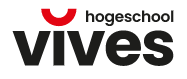<br>


**MACHINE LEARNING FUNDAMENTALS**<br>Andy Louwyck

---



---



# Linear regression

## Assignment 1

Load the "Diabetes" dataset with the function `load_diabetes()` from the `datasets` module of Scikit-Learn. What features are there?

Perform a linear regression to predict the target of the dataset based on the BMI of a patient. What is the R², the correlation coefficient and the MSE? Is there a strong linear relationship?

Make a scatterplot of the data and add the regression line.

## Assignment 2

[Kaggle](https://www.kaggle.com/) is an online community for people who are involved in data science and machine learning. You will find many interesting datasets with accompanying example code. Kaggle is also known for the competitions it organizes.

In this exercise we will download a simple dataset from Kaggle with features of houses: the surface area, the number of bedrooms, the age of the house and the price. The intention is to train a regression model based on this dataset with which we can then predict the price of a new house. Because we have 3 independent variables here (the features surface area, number of bedrooms and the age) and 1 dependent variable (the target price) we speak of **multivariate linear regression**. Synonyms are multivariable or multiple linear regression.

The dataset can be found here:

https://www.kaggle.com/code/pankeshpatel/ml-for-beginners-2-multivariate-regression/data.

Read the csv file and check if there are any missing values. You will notice that one value is missing for the number of bedrooms. Fill that value with the median of that variable. Of course you use code for this! For example, check Pandas method [`fillna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

In a next step we will check if we can effectively apply linear regression to the data. In other words, is there a linear relationship between the features and the target? We can use plot functions from the [seaborn](https://seaborn.pydata.org/) library for this, which is based on matplotlib and has been specially developed for creating statistical plots.

Create a [`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot) of the data and check whether there is indeed a linear relationship between the price and the other features. In addition to a visual check, we can of course also calculate the correlation coefficient. In a multivariate analysis we draw up a correlation matrix for this. Check Pandas method [`corr`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html). Visualize the matrix with the [`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function of `seaborn`.

This first phase of exploring the data is called **exploratory data analysis** (EDA). If you have set up the correlation matrix correctly, you will find that there is indeed a linear relationship between features and targets. So you can now apply linear regression using the `LinearRegression` class of `sklearn`. This is of course the **training phase**. Calculate the R² score and the Mean Absolute Error (MAE) to evaluate the obtained model.

Once the model has been trained and evaluated, we enter the **inference phase** in which we will make predictions with new data. Do this here for a house that is 5 years old, has 8 bedrooms and a surface area of ​​5000. What do you estimate the cost price of that house to be?

## Assignment 3

We can create our own datasets for linear regression using the function [`make_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression) from the `sklearn.datasets` module.

As an example, we generate a dataset with 10 samples for simple linear regression. This is a dataset consisting of 1 feature `x` and 1 target `y`. We add a `bias` of -3, which is another word for intercept, and `noise` with a standard deviation of 20.

Note that we also have to specify the number of 'informative' features here. These are features that effectively correlate with the target. In this case, we have 1 informative feature.

We fit the dataset using the `LinearRegression` class of module `sklearn.linear_model`, calculate the R² score, and finally plot the dataset with the regression line using basic pyplot functions and function [`lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot) of `seaborn`.

## Assignment 4

We use the `make_regression` function again to generate a dataset for multivariate linear regression. We take 1000 samples, 10 features of which 5 informative, 1 target, a bias of 15, and add noise with a standard deviation of 50.

We put the features and the target in a Pandas DataFrame. This way we can retrieve the most important statistics using the `describe` method. We can also quickly calculate the correlation matrix and see that indeed only 5 out of 10 features correlate with the target. Finally, we fit the dataset using a linear regression model and calculate the R² score, the MAE and the MSE to evaluate the model.

# Polynomial regression

## Assignment 5

We want to test polynomial regression and for that we are going to create a fictitious dataset using a polynomial function of which we know the equation:

> $y = -x^2 + x + 15$

We write a function ourselves to calculate `y` values ​​based on given `x` values. In this way we ensure that our code is reusable! We use the following function definition

```
def polynomial(coefs, x):
```
We test our function by generating values ​​for `x` between -5 and 5. We can use the function `np.linspace` for that

Now we plot those points on a graph and define a function again:
```
def draw_polynomial(coefs, x):
```

Now we are going to generate a scatter plot around that quadratic curve. We generate X values ​​in the interval $[-5,5]$. For the points on the Y-axis we use the polynomial function and add **noise** using the following formula:
```
polynomial(coefs, x) + random.gauss(mu=0, sigma=1.5)
```

Function `random.gauss` generates a random number that follows a normal distribution with mean `mu` and standard deviation `sigma`.

We generate 10 points and store the coordinates in a list called X and Y, respectively.

We visualize the generated data points on a scatter plot.

## Assignment 6

On the point cloud we generated, we now try out different models. First, we put the points in a data frame, and sort the generated data points along the X-axis.

We visualize the data points in the data frame again using a scatter plot to check whether the conversion to a data frame and the sorting were successful.

In the following code we show how we can apply polynomial regression using SciKit-Learn. We try out 4 models: a linear model, and three polynomial models of degree 2, 5 and 10.
We place these plots next to each other and also print the MSE per plot.
Such a plot can be used as a visual inspection of different models.
To evaluate overfitting, cross validation is used. We repeatedly reserve a piece of the training set as a validation set.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
degrees = [1, 2, 5, 10]

# select feature and label from data frame "data"
X_train = data['x'].to_numpy()
y_train = data['y'].to_numpy()

plt.figure(figsize=(14, 5))

for i in range(len(degrees)):

    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # Make pipeline for polynomial regression and fit data
    polynomial_features = PolynomialFeatures(
        degree=degrees[i],
        include_bias=False Set # to False because intercept/bias is also included in LinearRegression!
    )
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train[:, np.newaxis], y_train) # X must be 2D matrix!

    # Validate the models using crossvalidation
    scores = cross_val_score(pipeline, X_train[:, np.newaxis], y_train,
                             scoring="neg_mean_squared_error", # neg_mean_squared error = -MSE
                             cv=10) # cv is the number of folds

    # Regression curve
    X_curve = np.linspace(-5, 5, 100)
    Y_curve = pipeline.predict(X_curve[:, np.newaxis])
    Y_true = polynomial(coefs, X_curve) # original model

    #Plot
    plt.plot(X_curve, Y_curve, label="Model")
    plt.plot(X_curve, Y_true, label="True function")
    plt.scatter(X_train, y_train, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((-5, 5))
    plt.ylim((-20, 20))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()));

# Regularization

## Assignment 7

We are now going to apply polynomial regression with regularization to the dataset we generated. We use a polynomial of degree 10. First, we perform the regression without regularization so that we can clearly see the effect.

We base ourselves on the code above, but this time we do not apply cross-validation. We plot the result on a figure and make sure that the figure shows both the original polynomial function, the data cloud, and the regression curve.

We now do the same thing but this time we apply **Ridge regression**. We use the following code for this:

> `polyreg=make_pipeline(PolynomialFeatures(degree, include_bias=False), Ridge(alpha=0.1, tol=0.1))`

Finally, we also apply **Lasso regression**. For this we use the following code:

> `polyreg=make_pipeline(PolynomialFeatures(degree, include_bias=False), Lasso(alpha=0.1, tol=0.1))`

# Training, validating, testing

## Assignment 8

In this assignment we illustrate the full training phase with **simple hold-out validation**. We also test the selected model, and do a final training on the full dataset to arrive at our final model.

Read the dataset "LinkedIn.csv" as a Pandas dataframe.

Split your dataset as follows: take 500 random data points for each validation and test set; the remaining data points form the training set. Tip: check scikit-learn function `train_test_split`.

Apply simple linear regression and 2nd degree polynomial regression to the training set. Calculate the MSE for each training and validation set. Which model do you choose?

Evaluate the selected model with the test set. Do you get an equally good result? If so, train your final model on the full set.

## Assignment 9

In this assignment, we illustrate the full training phase with **K-fold cross-validation**. We also test the selected model, and do a final training on the full dataset to arrive at our final model.

Read the dataset "LinkedIn.csv" as a Pandas dataframe.

Split your dataset as follows: take 500 random data points for the test set; the remaining data points form the training set. Tip: check scikit-learn function `train_test_split`.

Apply simple linear regression and 2nd degree polynomial regression to the training set. Apply K-fold cross-validation with 15 folds. Tip: check scikit-learn function `cross_validate`. Calculate the average MSE for training and validation for both. Which model do you choose?

Retrain the selected model on the full training set and evaluate with the test set. Do you get an equally good result? If so, train your final model on the full dataset.